<a href="https://colab.research.google.com/github/Crispis723/TelecomX-2_LATAM/blob/main/TelecomX2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

Llamamos las librerias que vamos a utilizar

In [35]:
import pandas as pd, numpy as np, json, joblib, re, os #importamos lasl librerias buascas
from pathlib import Path
from sklearn.model_selection import StratifiedKFold, train_test_split # importamos las librerias para entrenar el modelo
from sklearn.compose import ColumnTransformer # para transfomra conlumans
from sklearn.preprocessing import OneHotEncoder, StandardScaler # para converison de datos text a datos  para el modelo
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_recall_curve, roc_curve  # llamamos estas librerias para evaluar el modelo y los dayos
from sklearn.metrics import classification_report, confusion_matrix # evaluar el rendimineot
from sklearn.linear_model import LogisticRegression # usamo modelos de regresion
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #inportamos los tipos de modelo
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline #para validacion de datos
import matplotlib.pyplot as plt, seaborn as sns #graficas
import warnings
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

warnings.filterwarnings('ignore')

Le asignamos una variable a la URL

In [15]:
url = "https://raw.githubusercontent.com/Crispis723/challenge-Telecom-X/main/TelecomX%20(1).csv" #guardamos la url
try:
 df = pd.read_csv(url) #guardamos el data frame

except Exception as e:
 raise SystemExit(f"No se pudo leer '{CSV_PATH}': {e} Sube el CSV y actualiza CSV_PATH") #ejecutamos un exceotion or sia hay probrlmas


print('Dimensiones originales:', df.shape) # miramos el tamaño
print('Primeras columnas (muestra):', list(df.columns[:30])) #miramos el nomobre de las listas


Dimensiones originales: (7032, 22)
Primeras columnas (muestra): ['ID_Cliente', 'Cancelacion', 'Genero', 'Ciudadano_Senior', 'Pareja', 'Dependientes', 'Antiguedad', 'Servicio_Telefono', 'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargo_Diario']


 # 📘 Diccionario de datos

*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

#🔧 Manipulacion de datos

Miramos la informacion del dataframe

In [12]:
df.info() #miramos la informacion del datafram

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7032 non-null   object 
 1   Cancelacion             7032 non-null   int64  
 2   Genero                  7032 non-null   object 
 3   Ciudadano_Senior        7032 non-null   int64  
 4   Pareja                  7032 non-null   int64  
 5   Dependientes            7032 non-null   int64  
 6   Antiguedad              7032 non-null   int64  
 7   Servicio_Telefono       7032 non-null   int64  
 8   Lineas_Multiples        7032 non-null   int64  
 9   Servicio_Internet       7032 non-null   object 
 10  Seguridad_Online        7032 non-null   int64  
 11  Respaldo_Online         7032 non-null   int64  
 12  Proteccion_Dispositivo  7032 non-null   int64  
 13  Soporte_Tecnico         7032 non-null   int64  
 14  Streaming_TV            7032 non-null   

Miramos las  10  primeras

In [13]:
df.head(10) #miramos un par de datos de datafram

,ID_Cliente,Cancelacion,Genero,Ciudadano_Senior,Pareja,Dependientes,Antiguedad,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
5,0013-MHZWF,0,Female,0,0,1,9,1,0,DSL,...,0,1,1,1,Month-to-month,1,Credit card (automatic),69.40,571.45,2.313333
6,0013-SMEOE,0,Female,1,1,0,71,1,0,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),109.70,7904.25,3.656667
7,0014-BMAQU,0,Male,0,1,0,63,1,1,Fiber optic,...,0,1,0,0,Two year,1,Credit card (automatic),84.65,5377.80,2.821667
8,0015-UOCOJ,0,Female,1,0,0,7,1,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,48.20,340.35,1.606667
9,0016-QLJIS,0,Female,0,1,1,65,1,1,DSL,...,1,1,1,1,Two year,1,Mailed check,90.45,5957.90,3.015000


Detección automática de columnas tipo ID y alta cardinalidad
 Heurística:
 - Nombres que contienen 'id', 'cliente', 'customer', 'account', 'num', 'numero', 'nro', 'folio'
- Columnas con >95% valores únicos (probables IDs)

In [16]:
id_regex = re.compile(r"(id|cliente|customer|account|num|numero|nro|folio) ", flags=re.I) #ue busca nombres de columnas que contengan términos típicos de identificadores (como id, cliente, nro, etc.).
possible_ids = [c for c in df.columns if id_regex.search(c)]


high_cardinality = [c for c in df.columns if df[c].nunique(dropna=False)/len(df) > 0.95] #Detecta columnas con más del 95% de valores únicos.


candidates = list(dict.fromkeys(possible_ids + high_cardinality)) #Fusiona ambas listas


print('Candidatas (heurística) a eliminar:')
for c in candidates:
  print(f" - {c} | nunique={df[c].nunique()} | dtype={df[c].dtype}")


# Guarda copia por seguridad antes de eliminar
df_backup = df.copy()


Candidatas (heurística) a eliminar:
 - ID_Cliente | nunique=7032 | dtype=object


4) Eliminación controlada de IDs
 - Revisa la lista anterior. Si hay columnas que quieres mantener, añádelas a `keep_cols`.
- Las columnas en `candidates` que no estén en `keep_cols` se eliminarán.

In [18]:
keep_cols = [] #columans  por si se quieren conservar

cols_to_drop = [c for c in candidates if c not in keep_cols] #Filtra las columnas que sí se eliminarán
print("Se eliminarán las columnas:", cols_to_drop)

df_clean = df.drop(columns=cols_to_drop, errors='ignore').copy() #Elimina las columnas seleccionadas del DataFrame original.
print("Dimensiones tras eliminar IDs candidatos:", df_clean.shape)

# Guardamos la lista de columnas eliminadas en el directorio actual
pd.Series(cols_to_drop, name='dropped_columns').to_csv('dropped_columns.csv', index=False)
print("Guardado: dropped_columns.csv")


Se eliminarán las columnas: ['ID_Cliente']
Dimensiones tras eliminar IDs candidatos: (7032, 21)
Guardado: dropped_columns.csv


Revisamos  el tipo de los datos
 5) Detectar columnas categóricas (y numéricas discretas)
 - `object` y `category` se consideran categóricas.
 - También tratamos como categóricas las numéricas con ≤10 valores únicos (heurística).

In [19]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()#Detecta todas las columnas de tipo numérico
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist() #Detecta todas las columnas categóricas

# Heurística: numéricas con pocos valores -> categóricas
num_as_cat = [c for c in num_cols if df_clean[c].nunique() <= 10]
for c in num_as_cat:
    num_cols.remove(c)
    if c not in cat_cols:
        cat_cols.append(c)

print("Columnas numéricas detectadas:", num_cols)
print("Columnas categóricas detectadas (incluye num discretas):", cat_cols)

pd.DataFrame({'num_cols': num_cols}).to_csv('num_cols.csv', index=False)
pd.DataFrame({'cat_cols': cat_cols}).to_csv('cat_cols.csv', index=False)
print("Guardado: num_cols.csv, cat_cols.csv")


Columnas numéricas detectadas: ['Antiguedad', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargo_Diario']
Columnas categóricas detectadas (incluye num discretas): ['Genero', 'Servicio_Internet', 'Contrato', 'Metodo_Pago', 'Cancelacion', 'Ciudadano_Senior', 'Pareja', 'Dependientes', 'Servicio_Telefono', 'Lineas_Multiples', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica']
Guardado: num_cols.csv, cat_cols.csv


 6) One-Hot Encoding(convertir en valores numericos) reproducible con ColumnTransformer
 - Imputación: '__MISSING__' para categorías
 - OneHotEncoder(handle_unknown='ignore') para que el pipeline no falle en producción
 - Dejamos las numéricas en 'passthrough' (no escalamos aquí; escala si lo pides después)


In [24]:
try:
    # scikit-learn >= 1.2
    ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) #evita errores si aparecen categorías nuevas en producción,genera una matriz densa.
except TypeError:
    # scikit-learn < 1.2
    ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) #

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='__MISSING__')),
    ('ohe', ohe_encoder)
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_cols) #Se crea un ColumnTransformer que aplica el pipeline solo a columnas categórica
], remainder='passthrough')  # dejamos numéricas en passthrough

# Fit del preprocesador (ejecuta en tu dataset)
preprocessor.fit(df_clean)
print("Preprocessor ajustado correctamente.")

Preprocessor ajustado correctamente.



 7) Extraer nombres de features resultantes (OHE + numéricas 'passthrough')


In [25]:
feature_names = []
if cat_cols:
    ohe = preprocessor.named_transformers_['cat'].named_steps['ohe'] #cambiamos el nombre de las columnas
    ohe_names = list(ohe.get_feature_names_out(cat_cols)) #Extrae los nombres de las columnas generadas por el OneHotEncoder
    feature_names.extend(ohe_names) #añadimos las listas

# añadir columnas numéricas al final (remainder='passthrough' las deja así)
feature_names.extend(num_cols)

print("Número estimado de columnas tras OHE:", len(feature_names))
print("Primeros 40 nombres de feature:")
print(feature_names[:40])

pd.DataFrame({'feature': feature_names}).to_csv('feature_names_ohe_plus_num.csv', index=False)
print("Guardado: feature_names_ohe_plus_num.csv")


Número estimado de columnas tras OHE: 42
Primeros 40 nombres de feature:
['Genero_Female', 'Genero_Male', 'Servicio_Internet_DSL', 'Servicio_Internet_Fiber optic', 'Servicio_Internet_No', 'Contrato_Month-to-month', 'Contrato_One year', 'Contrato_Two year', 'Metodo_Pago_Bank transfer (automatic)', 'Metodo_Pago_Credit card (automatic)', 'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check', 'Cancelacion_0', 'Cancelacion_1', 'Ciudadano_Senior_0', 'Ciudadano_Senior_1', 'Pareja_0', 'Pareja_1', 'Dependientes_0', 'Dependientes_1', 'Servicio_Telefono_0', 'Servicio_Telefono_1', 'Lineas_Multiples_0', 'Lineas_Multiples_1', 'Seguridad_Online_0', 'Seguridad_Online_1', 'Respaldo_Online_0', 'Respaldo_Online_1', 'Proteccion_Dispositivo_0', 'Proteccion_Dispositivo_1', 'Soporte_Tecnico_0', 'Soporte_Tecnico_1', 'Streaming_TV_0', 'Streaming_TV_1', 'Streaming_Peliculas_0', 'Streaming_Peliculas_1', 'Factura_Electronica_0', 'Factura_Electronica_1', 'Antiguedad', 'Cargos_Mensuales']
Guardado: feature_nam

 8) Transformar el dataset y guardar resultado final (CSV + preprocessor serializado)
- Atención: transformar todos los datos puede consumir memoria según el tamaño.

In [28]:
X_encoded = preprocessor.transform(df_clean)

# Convertir a DataFrame con los nombres de columnas (puede ser grande)
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
print("Shape X_encoded_df:", X_encoded_df.shape)

X_encoded_df.to_csv('X_encoded_step1.csv', index=False)
joblib.dump(preprocessor, 'preprocessor_step1.joblib')
print("Guardados: X_encoded_step1.csv y preprocessor_step1.joblib")

X_encoded_df.sample(10)

Shape X_encoded_df: (7032, 42)
Guardados: X_encoded_step1.csv y preprocessor_step1.joblib


,Genero_Female,Genero_Male,Servicio_Internet_DSL,Servicio_Internet_Fiber optic,Servicio_Internet_No,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Metodo_Pago_Bank transfer (automatic),Metodo_Pago_Credit card (automatic),...,Streaming_TV_0,Streaming_TV_1,Streaming_Peliculas_0,Streaming_Peliculas_1,Factura_Electronica_0,Factura_Electronica_1,Antiguedad,Cargos_Mensuales,Cargos_Totales,Cargo_Diario
585,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,68.0,103.75,7039.45,3.458333
2592,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,42.0,74.15,3229.40,2.471667
3395,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,66.0,110.60,7210.85,3.686667
1462,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,54.0,65.65,3566.70,2.188333
373,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,58.0,70.10,4048.95,2.336667
5013,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,53.0,101.90,5549.40,3.396667
5345,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,5.0,80.60,415.55,2.686667
5520,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,6.0,20.15,130.50,0.671667
1149,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,39.0,25.25,947.75,0.841667
1987,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,20.25,20.25,0.675000


9) Deefinimos como y(cancelacion) el objetivo de la varialbe   y x como los datos

In [30]:
y = df['Cancelacion']  # ajusta nombre de target si es distinto


# Aquí verificamos que X_encoded_df y y existan en el workspace; si no existen, carga/crea según tu flujo.
print("Variables actuales en el entorno (ejecuta esto para confirmar que tienes X/y):", [v for v in globals().keys() if v in ['X_encoded_df','df','df_clean','y']])

Variables actuales en el entorno (ejecuta esto para confirmar que tienes X/y): ['df', 'df_clean', 'X_encoded_df', 'y']


 10) Si tienes X_encoded_df (resultado OHE + num), definimos X e y y hacemos split estratificado.
   IMPORTANTE: el muestreo (SMOTE/oversampling/undersampling) debe aplicarse SOLO al set de ENTRENAMIENTO.


In [31]:
# %%
# Ajusta según tu variable target real
# Si tu target aún no está definido, intenta detectarlo (igual que en la notebook previa).
if 'X_encoded_df' in globals() and 'df' in globals():
    # ejemplo asumido: df tiene la columna target original
    possible_targets = [c for c in df.columns if c.lower() in ('cancelacion','churn','cancel','churned')]
    if possible_targets:
        target_col = possible_targets[0]
        print("Target detectado:", target_col)
        y = df[target_col]
        X = X_encoded_df.copy()
    else:
        raise SystemExit("No detecté target automáticamente. Define `y` manualmente.")
else:
    # Si solo tienes df_clean (antes de OHE) y el preprocessor, procede distinto
    if 'df_clean' in globals() and 'preprocessor' in globals():
        # transforma y extrae X e y como ejemplo
        X = pd.DataFrame(preprocessor.transform(df_clean), columns=pd.read_csv('feature_names_ohe_plus_num.csv')['feature'])
        # intenta detectar target en df_clean
        possible_targets = [c for c in df_clean.columns if c.lower() in ('cancelacion','churn','cancel','churned')]
        if possible_targets:
            target_col = possible_targets[0]
            y = df_clean[target_col]
        else:
            raise SystemExit("Define `y` manualmente.")
    else:
        raise SystemExit("No encuentro X_encoded_df ni df_clean + preprocessor. Carga o transforma tus datos primero.")

# Asegurarse que y esté codificado 0/1
y = y.replace({'SI':1,'SÍ':1,'Yes':1,'YES':1,'No':0,'NO':0,'N':0}).astype(int)

# Mostrar desbalance
from collections import Counter
cnt = Counter(y)
print("Distribución original (contador):", cnt)
print("Ratio minority/majority:", min(cnt.values())/max(cnt.values()))


Target detectado: Cancelacion
Distribución original (contador): Counter({0: 5163, 1: 1869})
Ratio minority/majority: 0.36199883788495063


11) Train/validation split estratificado (separar antes de aplicar cualquier muestreo)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Train shape:", X_train.shape, "Val shape:", X_val.shape)
from collections import Counter
print("Train distribution:", Counter(y_train))
print("Val distribution:", Counter(y_val))

Train shape: (5625, 42) Val shape: (1407, 42)
Train distribution: Counter({0: 4130, 1: 1495})
Val distribution: Counter({0: 1033, 1: 374})



12) Definir preprocesador con escalado SÓLO para features numéricas.
-   Si tu X ya es OHE + num (todo num), pero quieres escalar las columnas originalmente numéricas, debes conocer qué columnas corresponden a variables numéricas.


In [33]:
# las columnas que no empiezan por patrón de OHE (p.ej. contienen '=' o '_') suelen ser numéricas.
if 'num_cols' in globals() and isinstance(num_cols, list) and len(num_cols)>0:
    numeric_features = num_cols
else:
    # heurística: si tus feature names contienen "=", "___" o tu OHE usa formato like "colname_value"
    feature_names = list(X.columns)
    numeric_candidates = [f for f in feature_names if ('=' not in f and '_' not in f and f.isalpha())]
    # mejor dejarlo manual si no estás seguro
    numeric_features = numeric_candidates[:len(feature_names)//5]  # fallback heurístico muy básico
    print("Heurística numeric_features (revisa esto):", numeric_features[:20])

# Preprocessor: escalar SOLO numeric_features
scaler = StandardScaler()
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', scaler)
])

# ColumnTransformer: aplicamos scaler sobre numeric_features; resto lo dejamos tal cual
from sklearn.compose import ColumnTransformer
preproc_scaler = ColumnTransformer([
    ('num', num_transformer, numeric_features)
], remainder='passthrough')  # output reordena: num_scaled first, then passthrough columns


13) Definir las estrategias de muestreo que vamos a comparar:
  - Sin muestreo (baseline)
  - RandomOverSampler
  - RandomUnderSampler    
  - SMOTE (sintético)
  Usamos imblearn Pipeline para integrar preprocesamiento -> muestreo -> modelo.

In [60]:
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)


# Modelos a comparar:
log_clf = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight opcional junto a muestreo
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced_subsample')

# Pipelines (ejemplos):
#  - Logistic: aplicamos scaler (preproc_scaler) + sampler + logistic
pipeline_log_none = Pipeline(steps=[
    ('preproc', preproc_scaler),
    ('clf', log_clf)
])

pipeline_log_smote = Pipeline(steps=[
    ('preproc', preproc_scaler),
    ('smote', smote),
    ('clf', log_clf)
])

pipeline_log_ros = Pipeline(steps=[
    ('preproc', preproc_scaler),
    ('ros', ros),
    ('clf', log_clf)
])

pipeline_log_rus = Pipeline(steps=[
    ('preproc', preproc_scaler),
    ('rus', rus),
    ('clf', log_clf)
])

#  - RandomForest: no requiere escalado de numéricas; pero si quieres consistencia aplica preproc_scaler anyway.
pipeline_rf_none = Pipeline(steps=[
    ('preproc', preproc_scaler),
    ('clf', rf_clf)
])

pipeline_rf_smote = Pipeline(steps=[
    ('preproc', preproc_scaler),
    ('smote', smote),
    ('clf', rf_clf)
])


 14) Función de entrenamiento + evaluación sobre el set de validación

Calculamos: ROC-AUC, PR-AUC (average_precision), F1 (umbral 0.5) y clasificación por umbral optimizado.


In [61]:
# %%
def evaluate_pipeline(pipe, X_tr, y_tr, X_va, y_va):
    pipe.fit(X_tr, y_tr)
    # predict_proba may not exist for all estimators, but for logistic and RF it does
    proba = pipe.predict_proba(X_va)[:,1]
    roc = roc_auc_score(y_va, proba)
    pr = average_precision_score(y_va, proba)
    # usar umbral 0.5 por defecto para F1
    yhat = (proba >= 0.5).astype(int)
    f1 = f1_score(y_va, yhat)
    # mejor umbral por F1 en PR curve
    p, r, th = precision_recall_curve(y_va, proba)
    f1s = 2*p*r/(p+r+1e-12)
    best_idx = np.nanargmax(f1s)
    best_thr = th[max(best_idx-1, 0)] if len(th)>0 else 0.5
    yhat_best = (proba >= best_thr).astype(int)
    f1_best = f1_score(y_va, yhat_best)
    return {
        'roc_auc': roc, 'pr_auc': pr, 'f1_0.5': f1, 'best_thr': float(best_thr), 'f1_best': f1_best
    }

 15) Ejecutar comparaciones (esto puede tardar según tamaño de X_train).

  Compara pipelines de Logistic y RandomForest con distintas estrategias de muestreo.

In [62]:
experiments = {
    'log_none': pipeline_log_none,
    'log_smote': pipeline_log_smote,
    'log_ros': pipeline_log_ros,
    'log_rus': pipeline_log_rus,
    'rf_none': pipeline_rf_none,
    'rf_smote': pipeline_rf_smote
}

results = {}
for name, pipe in experiments.items():
    print("Entrenando y evaluando:", name)
    try:
        res = evaluate_pipeline(pipe, X_train, y_train, X_val, y_val)
        results[name] = res
        print(name, res)
    except Exception as e:
        print("Error en experimento", name, ":", e)
        results[name] = {'error': str(e)}

# Mostrar resultados en DataFrame para comparar
res_df = pd.DataFrame(results).T
display(res_df.sort_values('pr_auc', ascending=False))


Entrenando y evaluando: log_none
log_none {'roc_auc': np.float64(1.0), 'pr_auc': np.float64(1.0), 'f1_0.5': 1.0, 'best_thr': 0.009520863815671365, 'f1_best': 0.9986648865153538}
Entrenando y evaluando: log_smote
Error en experimento log_smote : All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=42)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't
Entrenando y evaluando: log_ros
Error en experimento log_ros : All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomOverSampler(random_state=42)' (type <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>) doesn't
Entrenando y evaluando: log_rus
Error en experimento log_rus : All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomUnderSampler(random_state=42)' (type <class 'imblearn.under_sampling._prototype_

,roc_auc,pr_auc,f1_0.5,best_thr,f1_best,error
log_none,1.0,1.0,1.0,0.009521,0.998665,NaN
rf_none,1.0,1.0,1.0,0.045,0.998665,NaN
log_smote,NaN,NaN,NaN,NaN,NaN,All intermediate steps should be transformers ...
log_ros,NaN,NaN,NaN,NaN,NaN,All intermediate steps should be transformers ...
log_rus,NaN,NaN,NaN,NaN,NaN,All intermediate steps should be transformers ...
rf_smote,NaN,NaN,NaN,NaN,NaN,All intermediate steps should be transformers ...


Creamos la columna valor diario

In [ ]:
df_final['Cargo_Diario'] = df_final['Cargos_Mensuales'] / 30


convertimos los datos a numeros

In [ ]:
yes_no_cols = ['Pareja', 'Dependientes', 'Servicio_Telefono', 'Lineas_Multiples',
                  'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
                  'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cancelacion']

# Convertimos columnas binarias
for col in yes_no_cols:
    df_final.loc[:, col] = df_final[col].map({'Yes': 1, 'No': 0})



#📊 Carga y análisis

df_final.

In [ ]:
df_final.head()


,ID_Cliente,Cancelacion,Genero,Ciudadano_Senior,Pareja,Dependientes,Antiguedad,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [ ]:
df_final.describe()


,Ciudadano_Senior,Antiguedad,Cargos_Mensuales,Cargos_Totales,Cargo_Diario
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


miramos la mediana y desviacion estandar

In [ ]:
print("Mediana de Cargos_Mensuales:", df_final['Cargos_Mensuales'].median())
print("Desviación estándar de Antiguedad:", df_final['Antiguedad'].std())


Mediana de Cargos_Mensuales: 70.35
Desviación estándar de Antiguedad: 24.54525970926324


In [ ]:
df.to_csv('TelecomX.csv', index=False, encoding='utf-8')


## Graficas

Creamos un formato para las graficas

In [ ]:
def preparar_df_binario(df_original):
    """Convierte columnas binarias 1/0 en Sí/No para visualización"""
    df_viz = df_original.copy()
    convertir = {1: 'Sí', 0: 'No'}

    columnas_binarias = [
        'Pareja', 'Dependientes', 'Servicio_Telefono', 'Lineas_Multiples',
        'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
        'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
        'Factura_Electronica', 'Cancelacion'
    ]

    for col in columnas_binarias:
        if col in df_viz.columns:
            df_viz[col] = df_viz[col].map(convertir)

    return df_viz


generamos la grafica de cancelacion

/tmp/ipython-input-2093579141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancelacion', data=df_vis, palette='Set2', ax=axs[0])
/tmp/ipython-input-2093579141.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancelacion', data=df_vis, palette='Set2', ax=axs[0])


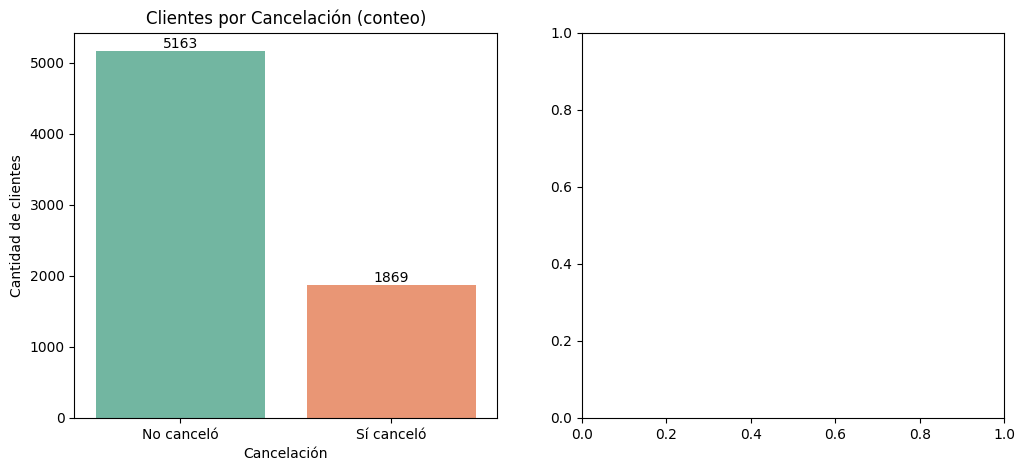

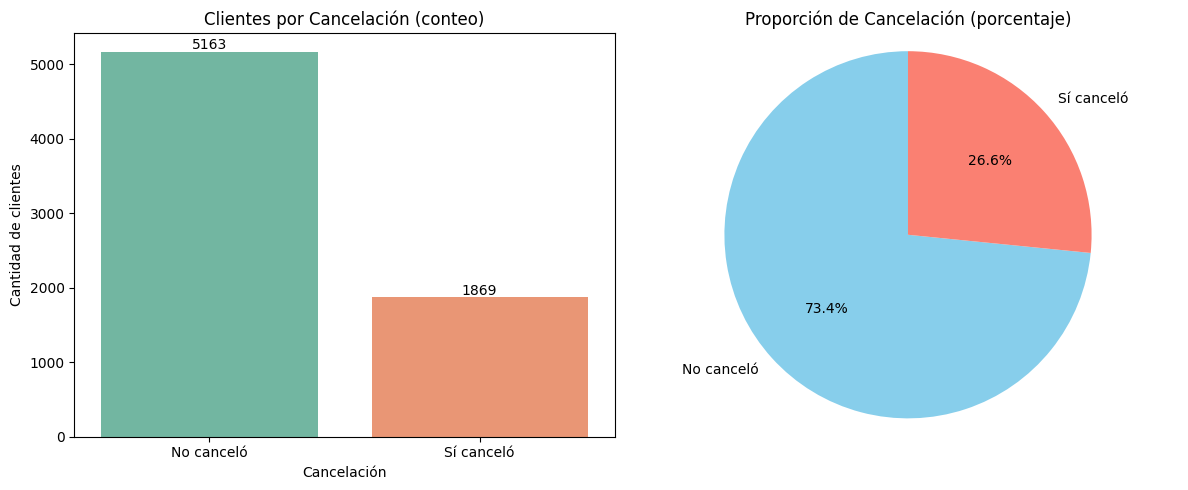

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras con valores exactos
sns.countplot(x='Cancelacion', data=df_vis, palette='Set2', ax=axs[0])
axs[0].set_title('Clientes por Cancelación (conteo)')
axs[0].set_xlabel('Cancelación')
axs[0].set_ylabel('Cantidad de clientes')

# Añadir etiquetas encima de las barras
for p in axs[0].patches:
    axs[0].annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Gráfico de pastel con porcentajes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras con valores exactos
sns.countplot(x='Cancelacion', data=df_vis, palette='Set2', ax=axs[0])
axs[0].set_title('Clientes por Cancelación (conteo)')
axs[0].set_xlabel('Cancelación')
axs[0].set_ylabel('Cantidad de clientes')

# Añadir etiquetas encima de las barras
for p in axs[0].patches:
    axs[0].annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Gráfico de pastel con porcentajes
churn_counts = df_vis['Cancelacion'].value_counts(normalize=True)
axs[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
           startangle=90, colors=['skyblue', 'salmon'])
axs[1].set_title('Proporción de Cancelación (porcentaje)')
axs[1].axis('equal')  # Mantiene la forma circular

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()



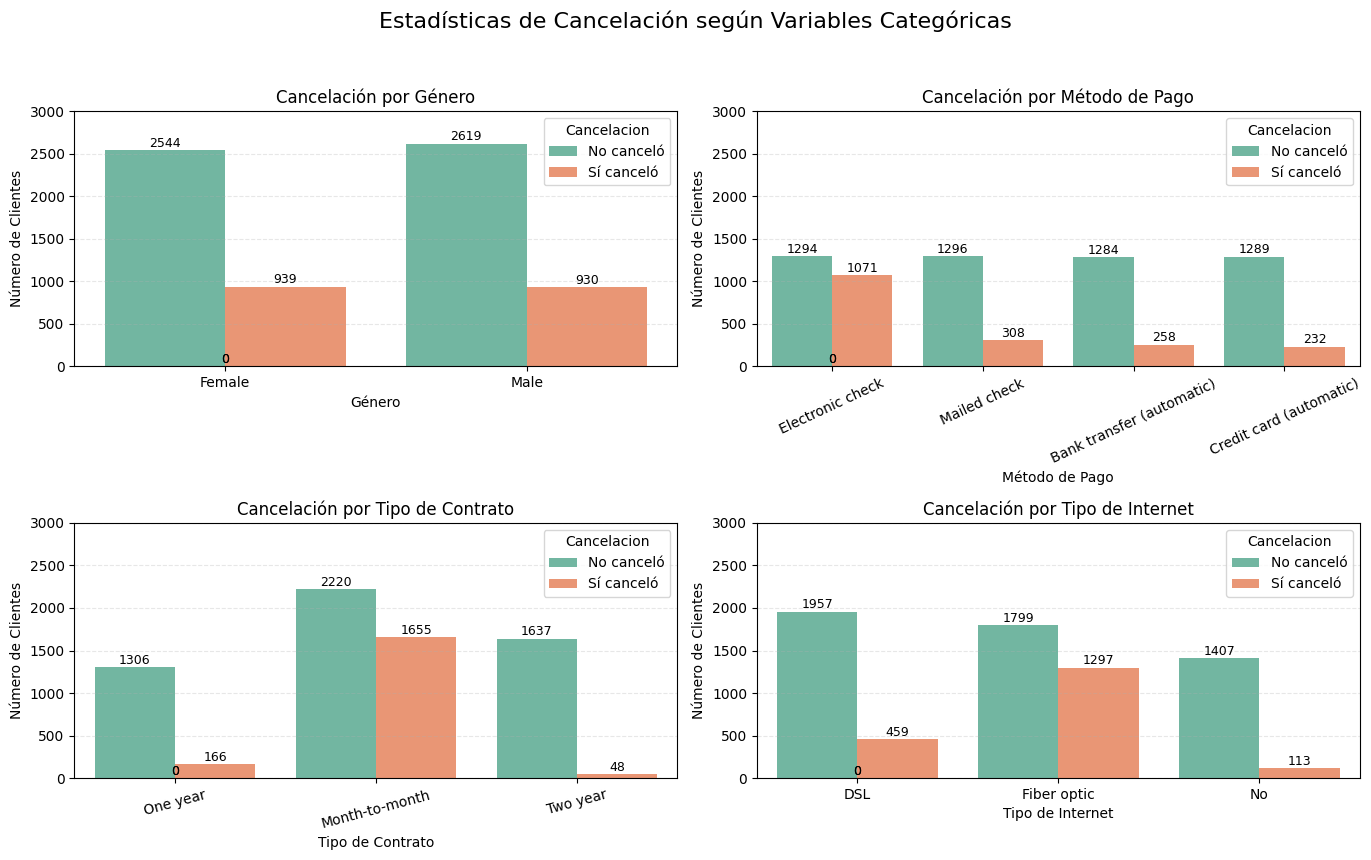

In [ ]:
# Mapeo más explicativo para cancelación
df_vis = preparar_df_binario(df_final)
df_vis['Cancelacion'] = df_vis['Cancelacion'].map({'Sí': 'Sí canceló', 'No': 'No canceló'})

fig, axs = plt.subplots(2, 2, figsize=(14, 9))
fig.subplots_adjust(wspace=0.4, hspace=0.5)
fig.suptitle("Estadísticas de Cancelación según Variables Categóricas", fontsize=16)

# --- Función para colocar etiquetas en cada barra ---
def etiquetar_barras(ax, formato='%d'):
    for p in ax.patches:
        valor = formato % p.get_height()
        ax.annotate(valor,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=9, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

# 🟣 Gráfico 1: Género
ax1 = sns.countplot(x='Genero', hue='Cancelacion', data=df_vis, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title("Cancelación por Género")
axs[0, 0].set_xlabel("Género")
axs[0, 0].set_ylabel("Número de Clientes")
etiquetar_barras(ax1)

# 🟣 Gráfico 2: Método de Pago (ordenado por tasa de cancelación)
orden_pago = df_vis.groupby('Metodo_Pago')['Cancelacion'].apply(lambda x: (x == 'Sí canceló').mean())
orden_pago = orden_pago.sort_values(ascending=False).index
ax2 = sns.countplot(x='Metodo_Pago', hue='Cancelacion', data=df_vis, palette='Set2',
                    ax=axs[0, 1], order=orden_pago)
axs[0, 1].set_title("Cancelación por Método de Pago")
axs[0, 1].set_xlabel("Método de Pago")
axs[0, 1].set_ylabel("Número de Clientes")
axs[0, 1].tick_params(axis='x', rotation=25)
etiquetar_barras(ax2)

# 🟣 Gráfico 3: Contrato
ax3 = sns.countplot(x='Contrato', hue='Cancelacion', data=df_vis, palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title("Cancelación por Tipo de Contrato")
axs[1, 0].set_xlabel("Tipo de Contrato")
axs[1, 0].set_ylabel("Número de Clientes")
axs[1, 0].tick_params(axis='x', rotation=15)
etiquetar_barras(ax3)

# 🟣 Gráfico 4: Tipo de Internet
ax4 = sns.countplot(x='Servicio_Internet', hue='Cancelacion', data=df_vis, palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title("Cancelación por Tipo de Internet")
axs[1, 1].set_xlabel("Tipo de Internet")
axs[1, 1].set_ylabel("Número de Clientes")
etiquetar_barras(ax4)

# ✨ Estilo uniforme
for ax in axs.ravel():
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.set_ylim(0, 3000)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



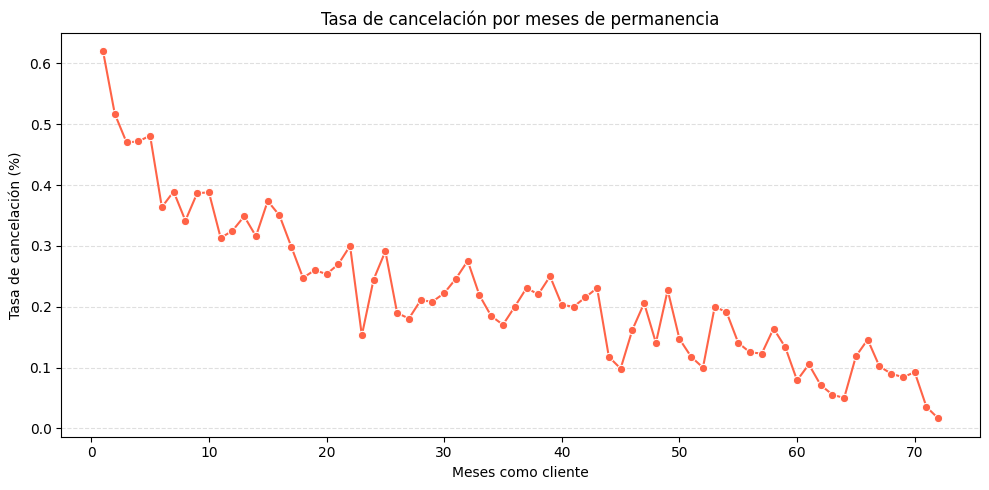

In [ ]:
# Crear copia del DataFrame
df_churn = df_final.copy()

# Agrupar por Antiguedad y calcular tasa de cancelación (ya está en 0/1)
churn_por_tenure = df_churn.groupby('Antiguedad')['Cancelacion'].mean()

# Visualización
plt.figure(figsize=(10, 5))
sns.lineplot(x=churn_por_tenure.index, y=churn_por_tenure.values, marker='o', color='tomato')
plt.title('Tasa de cancelación por meses de permanencia')
plt.xlabel('Meses como cliente')
plt.ylabel('Tasa de cancelación (%)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



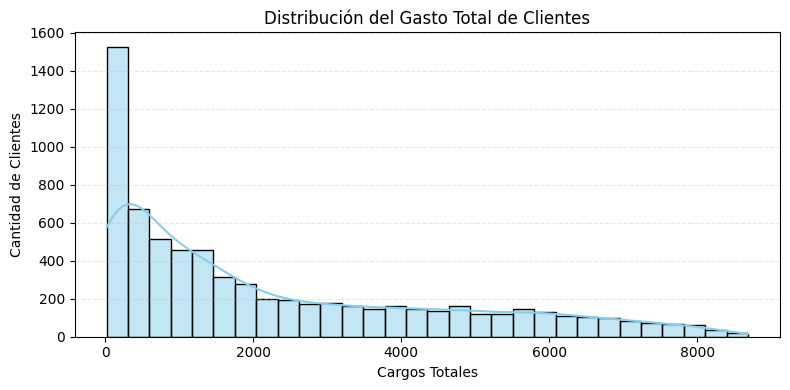

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_final['Cargos_Totales'], kde=True, bins=30, color='skyblue')
plt.title("Distribución del Gasto Total de Clientes")
plt.xlabel("Cargos Totales")
plt.ylabel("Cantidad de Clientes")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#📄Informe final

##🔹 1. Introducción
El objetivo principal de este análisis es entender los factores que influyen en la evasión de clientes (churn) en una empresa de telecomunicaciones. La evasión ocurre cuando un cliente cancela su contrato, lo que representa una pérdida directa de ingresos.

Mediante el análisis de los datos disponibles, buscamos responder preguntas como:

* ¿Qué perfiles de clientes son más propensos a cancelar?

* ¿Qué servicios o métodos de pago están asociados a mayor churn?

* ¿Qué patrones podemos encontrar para tomar decisiones estratégicas?

##🔹 2. Limpieza y Tratamiento de Datos
A partir del archivo JSON original, se aplicaron los siguientes pasos:

* Importación y normalización del archivo JSON.

* Conversión de columnas numéricas (como TotalCharges) a formato numérico con manejo de errores.

* Eliminación de registros nulos o inválidos (como churn vacío o errores de facturación).

* Corrección de inconsistencias en columnas como 'No internet service' → 'No'.

* Creación de nuevas columnas como:

  *  Cuentas_Diarias: estimación del costo diario por cliente.

* Conversión de variables categóricas a binarias (1/0) para facilitar análisis y modelado.

##3. Análisis Exploratorio de Datos (EDA)
####📊 Distribución de Churn
Se encontró un desbalance: la mayoría de los clientes no cancela, pero una fracción significativa sí lo hace.




```
# sns.countplot(x='Churn', data=df_final)
```

####📊 Churn según variables categóricas
Usando una matriz de 4 gráficos analizamos:

* Género: no hay gran diferencia entre hombres y mujeres.

* Tipo de contrato: los clientes con contrato mensual tienen mucho más churn.

* Método de pago: quienes pagan con cheque electrónico tienen mayor evasión.

* Tipo de internet: quienes usan Fiber optic presentan más churn.

####📊 Análisis de tenure y Churn
* Clientes con menos de 10 meses tienen la mayor tasa de evasión.

* Esto indica un problema en la retención temprana.

####📊 Análisis del Gasto Total (TotalCharges)
Matriz de 4 gráficos muestra:

1. Distribución del gasto total (asimétrica, muchos clientes pagan poco).

2. Boxplot de Churn muestra que quienes se van tienden a tener menos gasto.

3. Scatterplot confirma relación lineal entre tenure y TotalCharges.

4. Tasa de churn por rango de gasto revela que los que menos gastan son los más propensos a cancelar

##🔹 4. Conclusiones e Insights
La evasión está concentrada en clientes con contrato mensual.

* Clientes que usan Fiber Optic o pagan con cheque electrónico son más propensos a irse.

* La mayoría del churn ocurre en los primeros meses (menor a 10).

* Los clientes que gastan poco y llevan poco tiempo son los más volátiles.

* Clientes con mayor tenure y gasto tienden a ser más leales.

##🔹 5. Recomendaciones
Con base en los hallazgos, se sugieren las siguientes acciones:

* ✅ Fidelizar al cliente en los primeros meses: implementar programas de bienvenida, beneficios por permanencia o descuentos a los 3-6 meses.

* ✅ Incentivar contratos a largo plazo: campañas que premien pasar de mensual a anual.

* ✅ Revisar experiencia de clientes con Fiber Optic y cheque electrónico: posibles problemas técnicos o de facturación.

* ✅ Segmentar campañas por gasto total y riesgo de churn: usar modelos predictivos para enfocar esfuerzos en los clientes con mayor riesgo.

* ✅ Diseñar alertas para detectar patrones de salida temprana: por ejemplo, inactividad, bajo uso o quejas.